In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# 앤스콤 콰르텟(Anscombe's Quartet)

sns.load_dataset("anscombe")
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [33]:
# 기술 통계량 (개수,평균,분산 동일)

df2 = df.groupby("dataset").describe()
df2

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [37]:
# 데이터셋마다 x와 y의 상관관계(선형회귀) 동일

df3 = df.groupby("dataset").corr()
df3

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

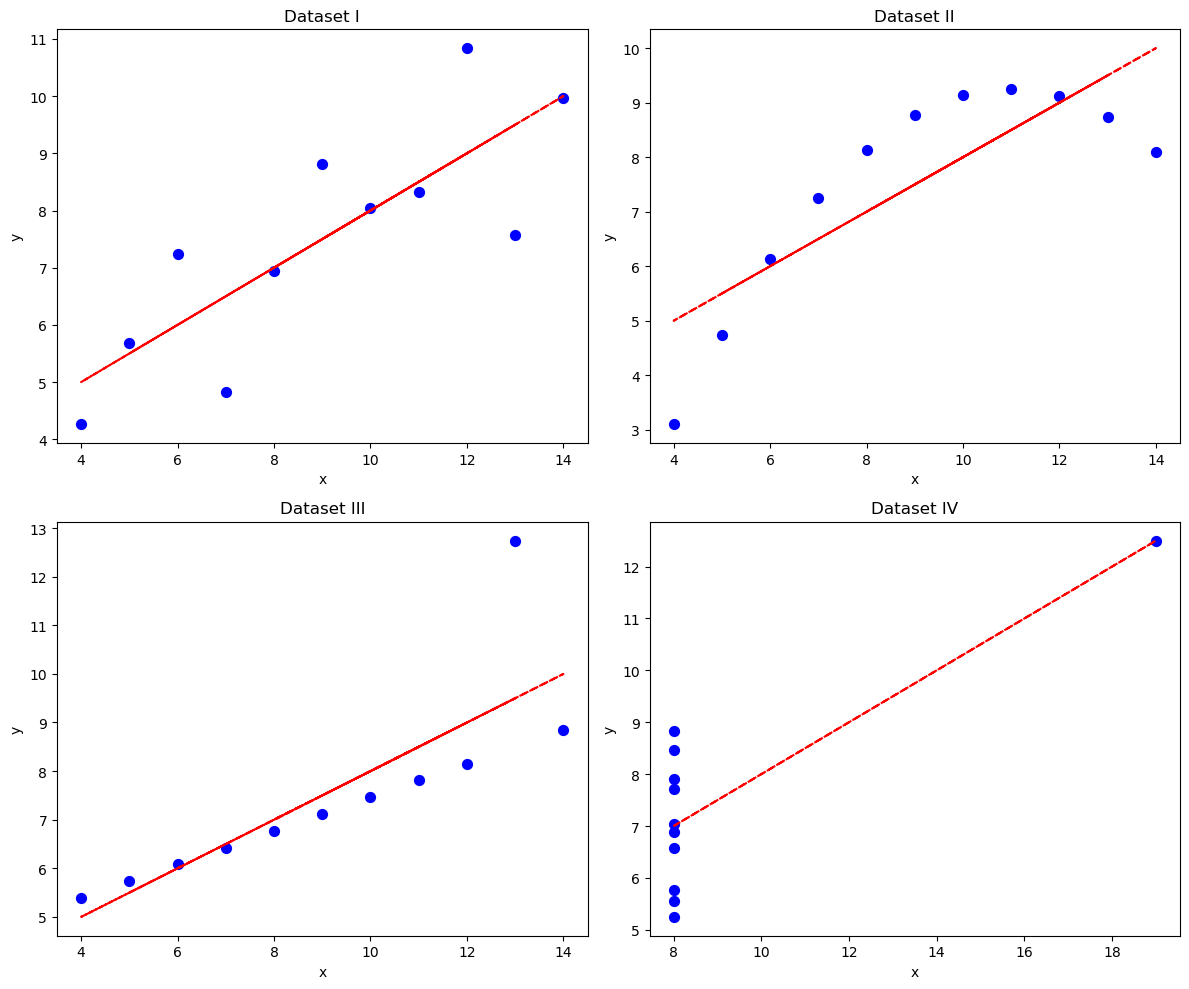

In [45]:
# 데이터 시각화 (산점도 + 회귀선)

# 네 개의 데이터셋 종류
datasets = df['dataset'].unique()

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # 2차원 배열을 1차원으로 변경

for i, dataset in enumerate(datasets):
    subset = df[df['dataset'] == dataset]
    axes[i].scatter(subset['x'], subset['y'], color='blue', s=50)
    axes[i].set_title(f'Dataset {dataset}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    
    # 선형 회귀선 추가
    m, b = np.polyfit(subset['x'], subset['y'], 1)
    axes[i].plot(subset['x'], m*subset['x'] + b, color='red', linestyle='--')

plt.tight_layout()
plt.show()

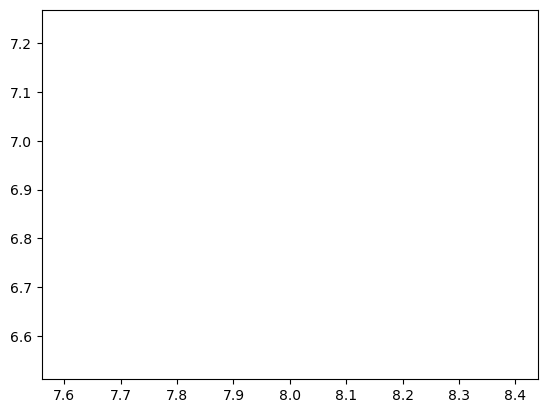

In [47]:
# Simple Line Plots 기본구조

plt.plot(x, y)
plt.show()

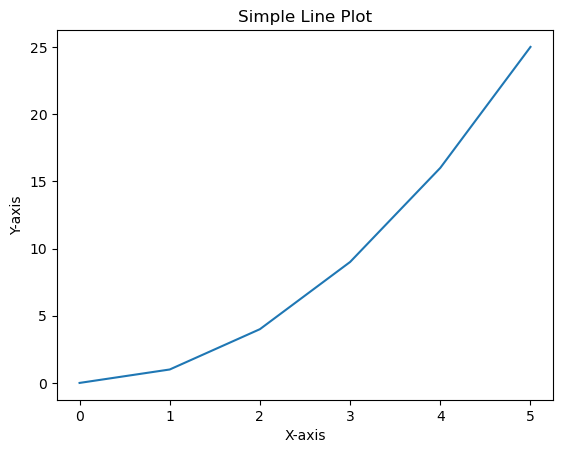

In [50]:
# Simple Line Plots 예제 1

x = [0, 1, 2, 3, 4, 5]   
y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

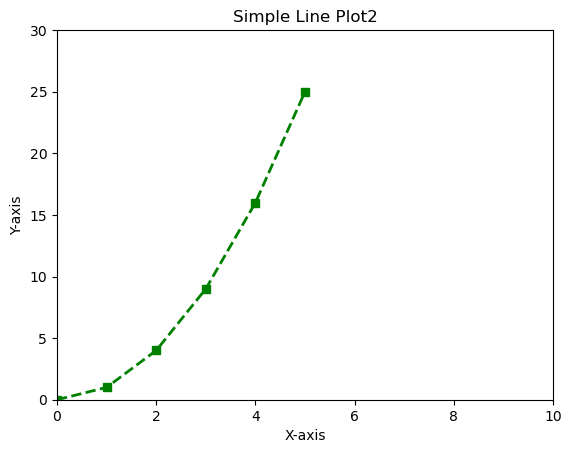

In [66]:
# Simple Line Plots 예제 2

plt.plot(x, y, color='green', linestyle='--', marker='s', linewidth=2, markersize=6) # 선 색상, 스타일, 점 모양, 선두께, 마커 크기
plt.title("Simple Line Plot2") # 그래프 타이틀 지정
plt.xlabel("X-axis") # x축 타이틀 지정
plt.ylabel("Y-axis") # y축 타이틀 지정
plt.xlim(0,10) # x축 범위
plt.ylim(0,30) # y축 범위
plt.show()

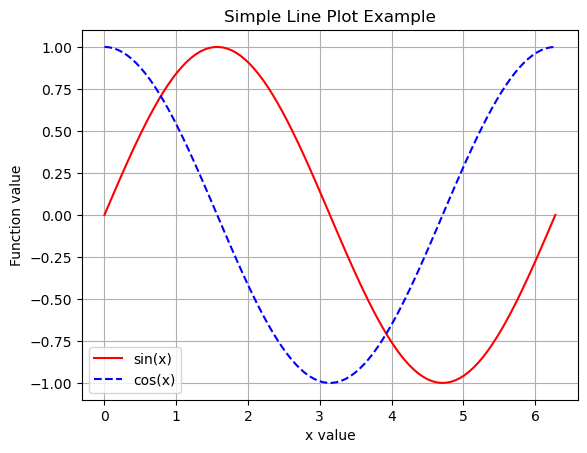

In [67]:
# Simple Line Plots 예제 3

# 데이터 생성
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 그래프 그리기
plt.plot(x, y1, label='sin(x)', color='red', linestyle='-')
plt.plot(x, y2, label='cos(x)', color='blue', linestyle='--')

# 그래프 꾸미기
plt.title("Simple Line Plot Example")
plt.xlabel("x value")
plt.ylabel("Function value")
plt.legend()
plt.grid(True) # 격자
plt.show()

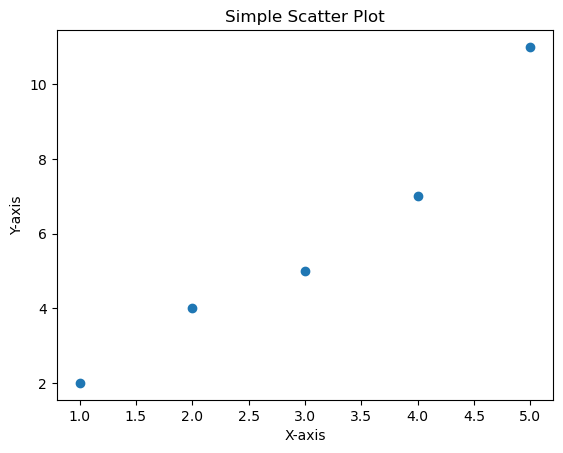

In [69]:
# Simple Scatter Plot 예제 1

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 7, 11]

plt.scatter(x, y)
plt.title("Simple Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

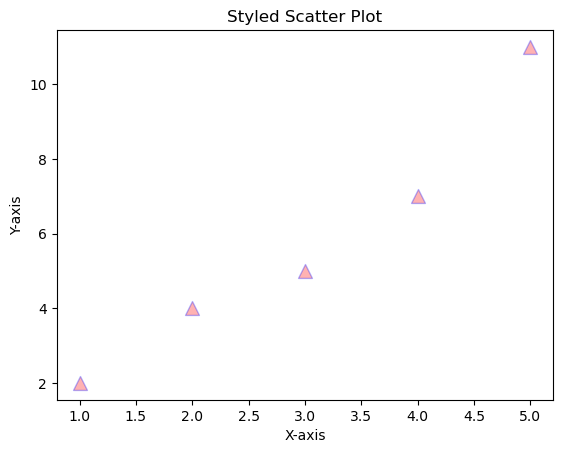

In [78]:
# Simple Scatter Plot 예제 2 

plt.scatter(x, y, color='red', marker='^', s=100, edgecolors='blue', alpha=0.3) # 점색상, 모양, 크기, 테두리색, 투명도
plt.title("Styled Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

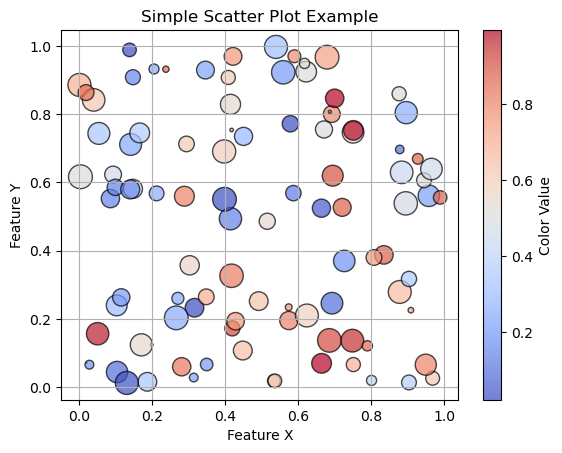

In [85]:
# Simple Scatter Plot 예제 3 

# 데이터 생성
np.random.seed(1)
x = np.random.rand(100)
y = np.random.rand(100)
sizes = 300 * np.random.rand(100) # 점크기
colors = np.random.rand(100) # 점색상

# 산점도 시각화
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap='coolwarm', edgecolors='black') # cmap =  컬러맵 (값의 변화에 따라 자연스럽게 색상 변화)
plt.title("Simple Scatter Plot Example")                                             # ex) viridis, plasma, coolwarm
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.colorbar(label='Color Value')
plt.grid(True)
plt.show()

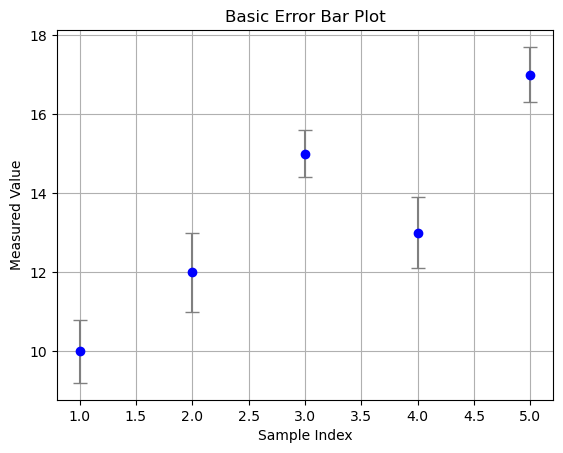

In [86]:
# 오류 시각화 (기본 오류 막대 그래프)

x = np.arange(1, 6)
y = np.array([10, 12, 15, 13, 17])
error = np.array([0.8, 1.0, 0.6, 0.9, 0.7])

plt.errorbar(x, y, yerr=error, fmt='o', capsize=5, color='blue', ecolor='gray') # yerr = y축 방향 오차범위, capsize = 막대 끝 선 길이
plt.title("Basic Error Bar Plot")
plt.xlabel("Sample Index")
plt.ylabel("Measured Value")
plt.grid(True)
plt.show()

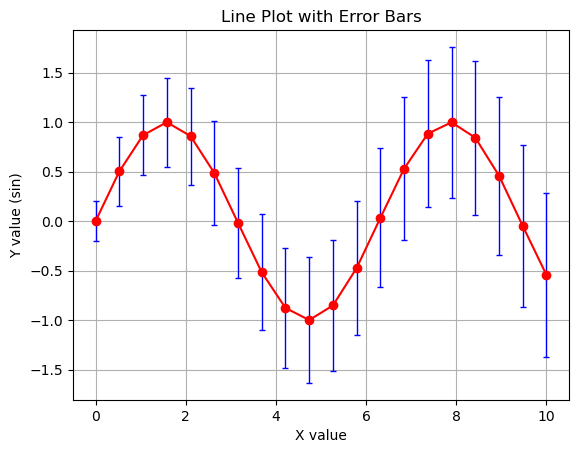

In [96]:
# 오류 시각화 2 (선 그래프 + 오차 범위 결합)

x = np.linspace(0, 10, 20)
y = np.sin(x)
error = 0.2 + 0.2 * np.sqrt(x)

plt.errorbar(x, y, yerr=error, fmt='-o', capsize=2, color='red', ecolor='blue', elinewidth=1)
plt.title("Line Plot with Error Bars")
plt.xlabel("X value")
plt.ylabel("Y value (sin)")
plt.grid(True)
plt.show()

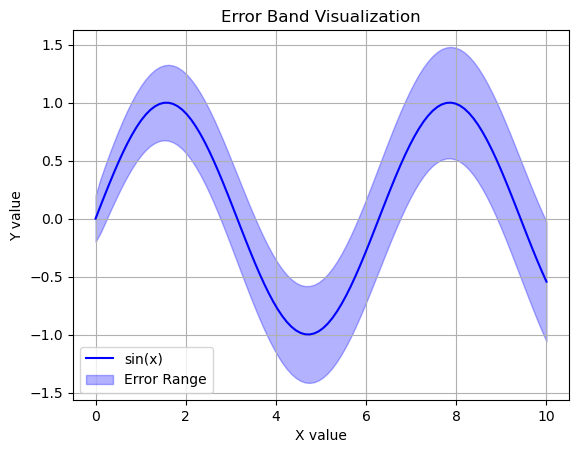

In [99]:
# 오류 시각화 3 (Error Band 표현)

x = np.linspace(0, 10, 100)
y = np.sin(x)
error = 0.2 + 0.1 * np.sqrt(x)

plt.plot(x, y, color='blue', label='sin(x)')
plt.fill_between(x, y - error, y + error, color='blue', alpha=0.3, label='Error Range')
plt.title("Error Band Visualization")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.grid(True)
plt.show()
# fill_between() 함수로 오차 범위를 면적(밴드) 형태로 표현
# 데이터의 변동성이 시각적으로 한눈에 들어옴

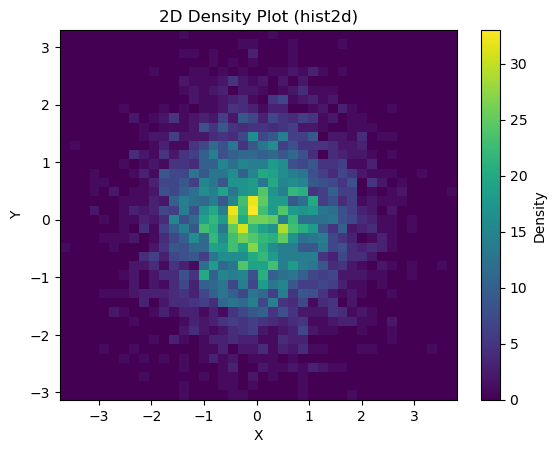

In [111]:
# 밀도 및 등고선 플롯 (Density & Contour Plot)
# 2D 히스토그램 (밀도 플롯)

# 데이터 생성
np.random.seed(0)
x = np.random.randn(5000)
y = np.random.randn(5000)

# 2D 밀도 플롯
plt.hist2d(x, y, bins=40, cmap='viridis') # bins = 40x40 픽셀 설정
plt.colorbar(label='Density')
plt.title("2D Density Plot (hist2d)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 데이터가 많이 모인 구역일수록 색이 진하게 표시.
# 분포 중심과 퍼짐 정도를 직관적으로 확인 가능.

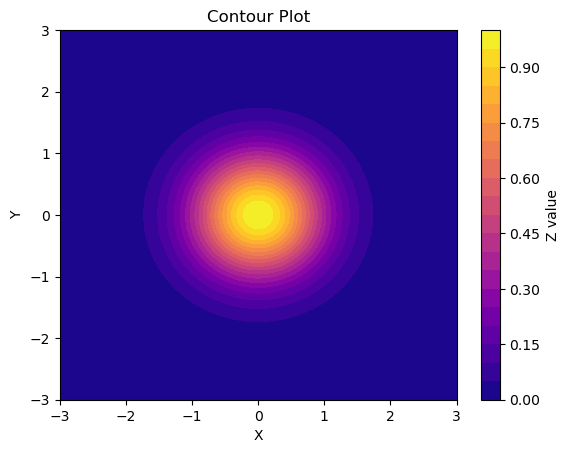

In [132]:
# 밀도 및 등고선 플롯 (Density & Contour Plot)
# 등고선 플롯

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**2 - Y**2)

plt.contourf(X, Y, Z, levels=20, cmap='plasma') #levels → 등고선 단계 수 설정, 등고선 사이를 색 표현 (색의 밝기 변화로 높낮이(값 크기)를 시각적 표현)
plt.colorbar(label='Z value')
plt.title("Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

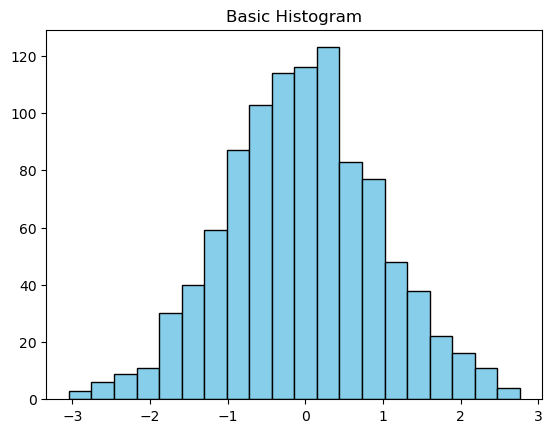

In [206]:
# 기본 히스토그램

np.random.seed(0)
data = np.random.randn(1000)  # 정규분포 데이터

plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Basic Histogram")
plt.show()

# 막대 높이는 각 구간(bin)에 속한 데이터 개수를 의미
# bins 수를 조정하면 세부 분포 확인 가능 (다음 예제에서 확인)

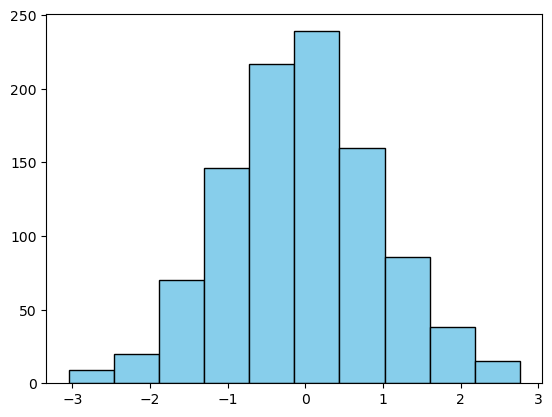

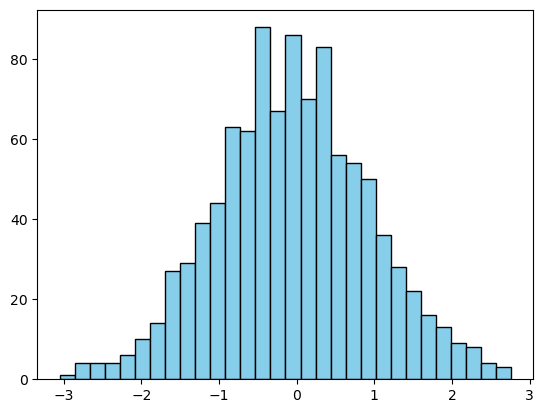

In [207]:
# 비닝 조정 비교

plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.show()

plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.show()

# bins 수가 적으면 -> 데이터 분포를 대략적으로
# bins 수가 많으면 -> 데이터 분포를 세밀하게

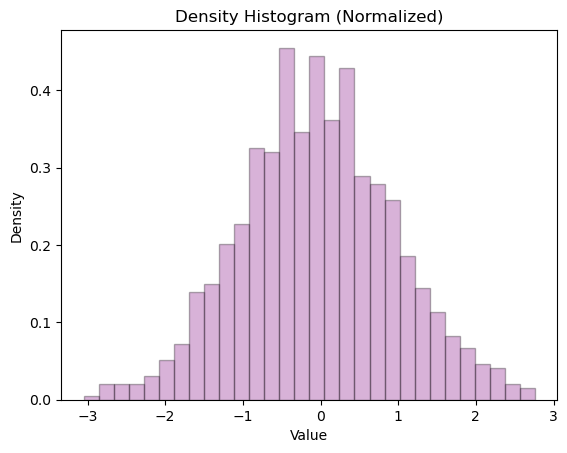

In [165]:
# 밀도 히스토그램 (정규화)

plt.hist(data, bins=30, density=True, color='purple', alpha=0.3, edgecolor='black') # density=True → 전체 면적 = 1
plt.title("Density Histogram (Normalized)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 빈도수 대신 확률밀도 (probability density) 표현
# 분표 형태 비교 시 유용

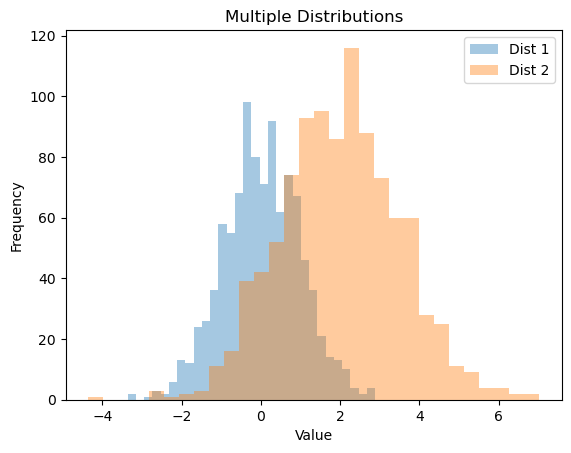

In [181]:
# 다중 분포 비교

data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1.5, 1000)

plt.hist(data1, bins=30, alpha=0.4, label='Dist 1') # alpha로 투명도 조절 → 분포 겹침 구간 시각화 (직관적)
plt.hist(data2, bins=30, alpha=0.4, label='Dist 2')
plt.title("Multiple Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

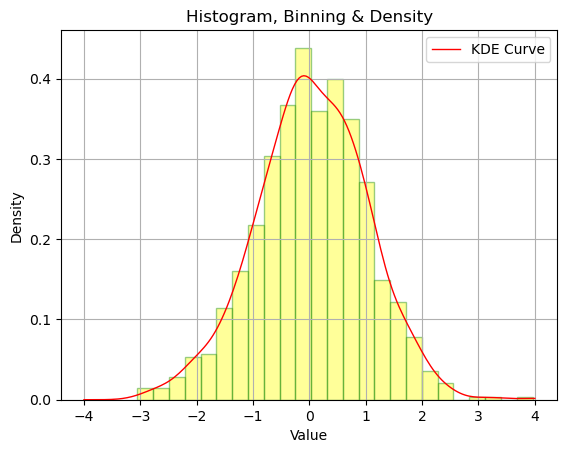

In [194]:
# 히스토그램 + 커널 밀도 추정(KDE)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde # 커널 밀도 추정(Kernel Density Estimation) 함수
                                     # 주어진 데이터로부터 확률 밀도 함수(PDF) 를 근사
                                      
# 데이터 생성
np.random.seed(1)
data = np.random.normal(0, 1, 1000) # 평균(μ)=0, 표준편차(σ)=1인 정규분포에서 1000개의 샘플 생성

# 히스토그램
plt.hist(data, bins=25, density=True, color='yellow', edgecolor='green', alpha=0.4) # 각 구간(bin)의 높이가 확률 밀도

# 밀도 곡선
x = np.linspace(-4, 4, 200) # -4부터 4까지 200개의 균등한 점 생성 (곡선 x축 좌표)
kde = gaussian_kde(data)    # 데이터로부터 커널 밀도 함수 (KDE) 학습
plt.plot(x, kde(x), color='red', linewidth=1, label='KDE Curve') # 계산된 밀도 함수 선으로 시각화

plt.title("Histogram, Binning & Density")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# 막대 히스토그램은 실제 데이터의 빈도 구조, 붉은 선 (KDE)은 데이터 분포의 연속 확률 밀도 추정. 
# 커널 밀도 추정(KDE)으로 얻은 그래프의 전체 면적은 1

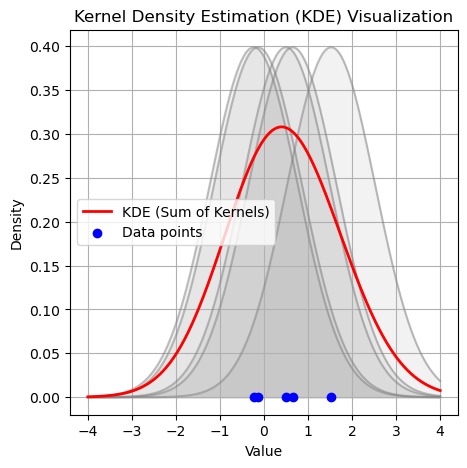

In [210]:
# 5장 심층분석 - 커널 밀도 추정

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# 데이터 생성 (예: 평균 0, 표준편차 1)
np.random.seed(42)
data = np.random.normal(0, 1, 5)  # 데이터 5개로 단순화

# x축 범위 설정
x = np.linspace(-4, 4, 400)

# 각 데이터점에 대해 개별 커널(가우시안) 시각화
plt.figure(figsize=(5,5))
bandwidth = 1  # 대역폭 (곡선 폭 조절용)

for d in data:
    # 각 데이터 포인트마다 가우시안 곡선 생성
    y = norm.pdf(x, d, bandwidth)
    plt.plot(x, y, color='gray', alpha=0.5)  # 개별 커널
    plt.fill_between(x, 0, y, color='gray', alpha=0.1)

# 모든 커널의 합 → KDE 근사
kde = gaussian_kde(data, bw_method=bandwidth / np.std(data)) # bandwidth - 대역폭 (곡선의 부드러움 조절)
plt.plot(x, kde(x), color='red', linewidth=2, label='KDE (Sum of Kernels)')

# 시각적 장식
plt.scatter(data, np.zeros_like(data), color='blue', zorder=5, label='Data points')
plt.title("Kernel Density Estimation (KDE) Visualization")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# 각 데이터 점마다 가우시안 커널(정규분포 곡선) 곡선들의 합/평균 -> 데이터 값 확률 밀도
# 커널 하나의 면적은 1/n
# 커널 n개를 모두 합치면 전체 면적 1
# 따라서 KDE 면적 1

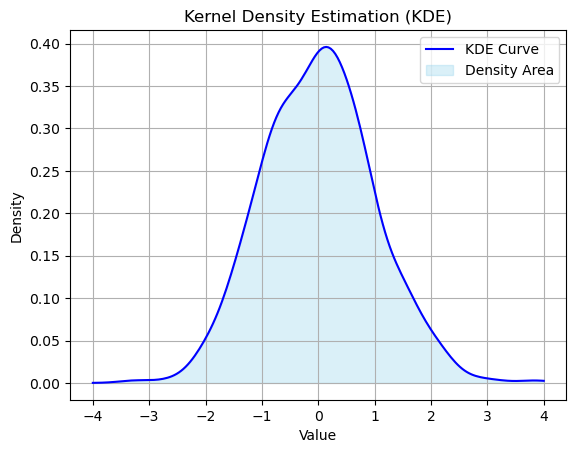

In [213]:
# 커널 밀도 추정

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 데이터 생성
np.random.seed(42)
data = np.random.normal(0, 1, 500)

# KDE 계산
kde = gaussian_kde(data) # SciPy의 KDE 함수, 가우시안 커널 사용

# X축 범위 정의
x = np.linspace(-4, 4, 200)

# 밀도 추정값 계산 (각 x 지점에서의 밀도 값 계산)
density = kde(x) 

# 시각화
plt.plot(x, density, color='blue', label='KDE Curve')
plt.fill_between(x, density, alpha=0.3, color='skyblue', label='Density Area') # KDE 곡선 아래 영역을 채워 시각적으로 강조
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
